#### Задание (2/2)
- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (6/7)
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [x] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [ ] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [x] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [x] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [x] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (4/5)
- [ ] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com



In [1]:
import pandas as pd

### Импорт данных
Использую pd.read_clipboard(), а не pd.read_csv, чтобы не удалять лишние данные (столбцы с % Difference to Average и строки с базовыми статистиками)

<h2 style="color:red">
   read_clipboard использовать было нельзя. Он невоспроизводим.
    
   Столбцы можно было удалить столбцы после вычитки?
</h2>

In [ ]:
# https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/edit#gid=0
basic = pd.read_clipboard()
basic.drop('Unnamed: 3', axis=1, inplace=True)

In [13]:
# https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/edit#gid=720312140
standart = pd.read_clipboard()
standart.drop('Unnamed: 3', axis=1, inplace=True)

In [45]:
# https://docs.google.com/spreadsheets/d/1Tc_aiVXrCrMNQFFDMiJGQ3Gm35szGLps_FIsonCe38Q/edit#gid=41907226
premium = pd.read_clipboard()
premium.drop('Unnamed: 3', axis=1, inplace=True)

In [53]:
# https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
ppp = pd.read_clipboard()
ppp.drop(['Unnamed: 3', 'Most Recent Year'], axis=1, inplace=True)
ppp = ppp.rename(index=str, columns={'Most Recent Value': 'GDP per capita'})

In [214]:
# https://statisticstimes.com/geography/countries-by-continents.php
regions = pd.read_clipboard()
regions.drop(['No','ISO-alpha3 Code', 'M49 Code', 'Region 1', 'Region 2'], axis=1, inplace=True)
regions = regions.rename(index=str, columns={'Country or Area': 'Country'})

In [47]:
data = pd.merge(basic, standart, on=['Country', 'Currency'], suffixes=('_basic', '_standart'))

premium = premium.add_suffix('_premium')
premium = premium.rename(index=str, columns={'Country_premium':'Country', 'Currency_premium':'Currency', 'Premium_premium':'Premium'})
data = pd.merge(data, premium, on=['Country', 'Currency'])

In [63]:
data = pd.merge(data, ppp, how='left', on='Country')

In [100]:
data[data['GDP per capita'].isnull()]

,Country,Basic,Currency,Price USD_basic,# of TV Shows_basic,# of Movies_basic,Total Library Size_basic,Price per Title_basic,Standard,Price USD_standart,...,Total Library Size_standart,Price per Title_standart,Premium,Price USD_premium,# of TV Shows_premium,# of Movies_premium,Average Total Library Size_premium,Price per Title_premium,GDP per capita,Region
27,Gibraltar,7.99,EUR,9.03,4079,2088,6167,0.00146,12.99,14.67,...,6167,0.00119,17.99,20.32,4079,2088,6167,0.00082,NaN,NaN


In [85]:
data.loc[data.Country == 'South Korea', 'GDP per capita'] = ppp.loc[ppp.Country == 'Korea, Rep.', 'GDP per capita'][0]
data.loc[data.Country == 'Venezuela', 'GDP per capita'] = ppp.loc[ppp.Country == 'Venezuela, RB', 'GDP per capita'][0]
data.loc[data.Country == 'Slovakia', 'GDP per capita'] = ppp.loc[ppp.Country == 'Slovak Republic', 'GDP per capita'][0]
data.loc[data.Country == 'Hong Kong', 'GDP per capita'] = ppp.loc[ppp.Country == 'Hong Kong SAR, China', 'GDP per capita'][0]
data.loc[data.Country == 'Russia', 'GDP per capita'] = ppp.loc[ppp.Country == 'Russian Federation', 'GDP per capita'][0]
data.loc[data.Country == 'Taiwan', 'GDP per capita'] = 28.306

In [222]:
data = pd.merge(data, regions, how='left', on='Country')

In [231]:
data[data['Continent'].isnull()]

,Country,Basic,Currency,Price USD_basic,# of TV Shows_basic,# of Movies_basic,Total Library Size_basic,Price per Title_basic,Standard,Price USD_standart,...,Premium,Price USD_premium,# of TV Shows_premium,# of Movies_premium,Average Total Library Size_premium,Price per Title_premium,GDP per capita,Region,Continent,Continent_y


In [230]:
data.loc[data.Country == 'South Korea', 'Continent'] = regions.loc[regions.Country == 'Republic of Korea', 'Continent'][0]
data.loc[data.Country == 'United Kingdom', 'Continent'] = regions.loc[regions.Country == 'United Kingdom of Great Britain and Northern Ireland', 'Continent'][0]
data.loc[data.Country == 'Russia', 'Continent'] = regions.loc[regions.Country == 'Russian Federation', 'Continent'][0]
data.loc[data.Country == 'Czech Republic', 'Continent'] = regions.loc[regions.Country == 'Czechia', 'Continent'][0]
data.loc[data.Country == 'Bolivia', 'Continent'] = regions.loc[regions.Country == 'Bolivia (Plurinational State of)', 'Continent'][0]
data.loc[data.Country == 'Venezuela', 'Continent'] = regions.loc[regions.Country == 'Venezuela (Bolivarian Republic of)', 'Continent'][0]
data.loc[data.Country == 'Hong Kong', 'Continent'] = regions.loc[regions.Country == 'China, Hong Kong Special Administrative Region', 'Continent'][0]
data.loc[data.Country == 'United States', 'Continent'] = regions.loc[regions.Country == 'United States of America', 'Continent'][0]
data.loc[data.Country == 'Taiwan', 'Continent'] = regions.loc[regions.Country == 'China', 'Continent'][0]
data.loc[data.Country == 'Moldova', 'Continent'] = regions.loc[regions.Country == 'Republic of Moldova', 'Continent'][0]

In [136]:
data['GDP per capita'] = data['GDP per capita'].str.replace(',','')
data['GDP per capita'] = pd.to_numeric(data['GDP per capita'])

### График корреляции между средним доходом и ценой подписки

<AxesSubplot:title={'center':'for basic plan'}, xlabel='Price USD_basic', ylabel='GDP per capita'>

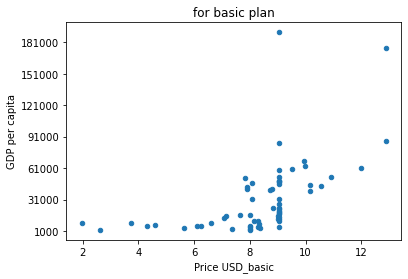

In [141]:
data[data['GDP per capita'].notnull()].plot.scatter(x = 'Price USD_basic', y = 'GDP per capita', 
                                                    title = 'for basic plan',
                                                    yticks=tuple(range(1000, 200000, 30000)))

<AxesSubplot:title={'center':'for standart plan'}, xlabel='Price USD_standart', ylabel='GDP per capita'>

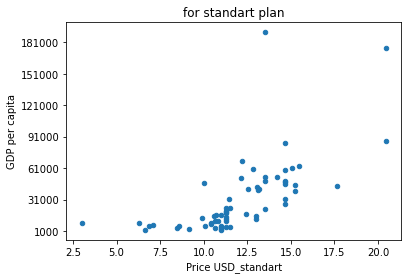

In [142]:
data[data['GDP per capita'].notnull()].plot.scatter(x = 'Price USD_standart', y = 'GDP per capita', 
                                                    title = 'for standart plan',
                                                    yticks=tuple(range(1000, 200000, 30000)))

<AxesSubplot:title={'center':'for premium plan'}, xlabel='Price USD_premium', ylabel='GDP per capita'>

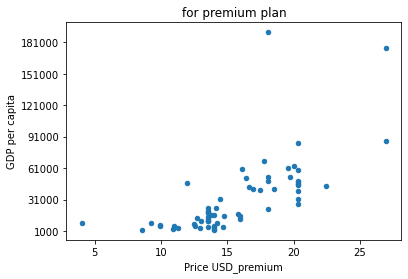

In [144]:
data[data['GDP per capita'].notnull()].plot.scatter(x = 'Price USD_premium', y = 'GDP per capita', 
                                                    title = 'for premium plan',
                                                    yticks=tuple(range(1000, 200000, 30000)))

Наблюдается положительная зависимость между уровень дохода на душу населения в стране и стоимостью всех планов подписки

### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.

In [180]:
means_by_currency = data.groupby('Currency').mean()[['Price USD_basic', 'Price USD_standart', 'Price USD_premium']].reset_index()

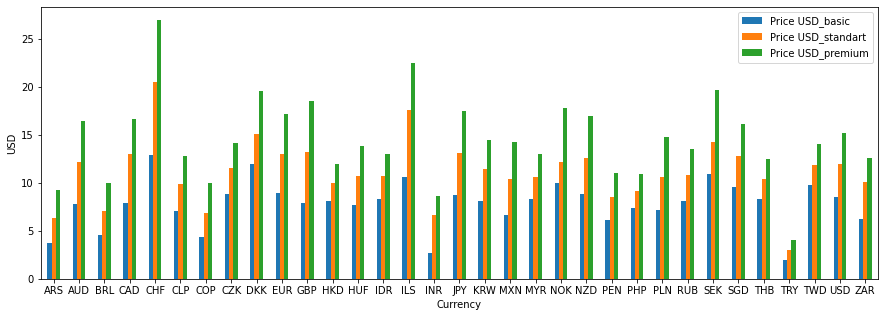

In [188]:
means_by_currency.index = means_by_currency['Currency']
ax = means_by_currency.plot.bar(rot=0, figsize=(15,5), ylabel='USD')

### Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента

In [232]:
means_by_continent = data.groupby('Continent').mean()[['Price USD_basic', 'Price USD_standart', 'Price USD_premium']].reset_index()

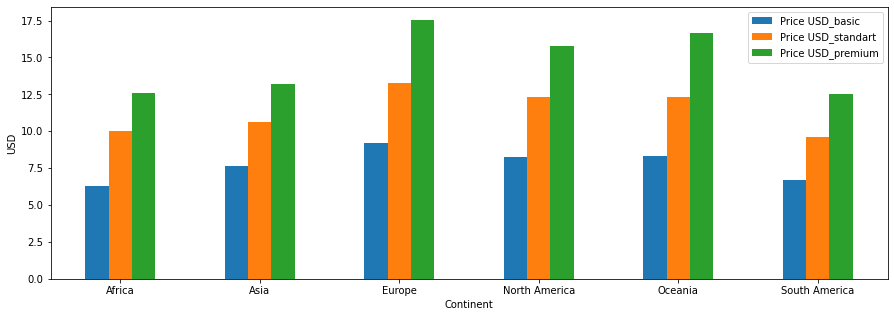

In [233]:
means_by_continent.index = means_by_continent['Continent']
ax = means_by_continent.plot.bar(rot=0, figsize=(15,5), ylabel='USD')

Самая высокая средняя стоимость подписки наблюдается в Европе, самая низкая - в Африке и Южной Америке

### Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [163]:
data[data['Country'].apply(lambda x: bool('Czech' in x))]['Price USD_basic'] / data[data['Country'].apply(
    lambda x: bool('Czech' in x)
)]['GDP per capita'] * 100

10    0.038505
dtype: float64

Базовая подписка составляет 0.04% от среднего дохода в Чехии

In [164]:
data[data['Country'].apply(lambda x: bool('Czech' in x))]['Price USD_standart'] / data[data['Country'].apply(
    lambda x: bool('Czech' in x)
)]['GDP per capita'] * 100

10    0.050104
dtype: float64

Стандартная подписка составляет 0.05% от среднего дохода в Чехии

In [165]:
data[data['Country'].apply(lambda x: bool('Czech' in x))]['Price USD_premium'] / data[data['Country'].apply(
    lambda x: bool('Czech' in x)
)]['GDP per capita'] * 100

10    0.061704
dtype: float64

Премиальная подписка составляет 0.06% от среднего дохода в Чехии

### Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

<h2 style="color:red">
   Сериалы — это TV Shows. Total Library Size — это Сериалы + Фильмы
</h2>

In [190]:
data.sort_values(by='Total Library Size_basic', axis=0, ascending=False)['Country'][:5].reset_index().drop('index', axis=1)

,Country
0,Czech Republic
1,Slovakia
2,Hungary
3,Bulgaria
4,United Kingdom


### Какой процент среднего дохода россиянина будет составлять подписка Netflix?

In [194]:
data[data['Country'].apply(lambda x: bool('Russia' in x))]['Price USD_basic'] / data[data['Country'].apply(
    lambda x: bool('Russia' in x)
)]['GDP per capita'] * 100

25    0.080283
dtype: float64

In [195]:
data[data['Country'].apply(lambda x: bool('Russia' in x))]['Price USD_standart'] / data[data['Country'].apply(
    lambda x: bool('Russia' in x)
)]['GDP per capita'] * 100

25    0.107044
dtype: float64

In [196]:
data[data['Country'].apply(lambda x: bool('Russia' in x))]['Price USD_premium'] / data[data['Country'].apply(
    lambda x: bool('Russia' in x)
)]['GDP per capita'] * 100

25    0.133903
dtype: float64

От 0.08% до 0.13% среднего дохода

### На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)

In [203]:
data = data.sort_values(['Price per Title_basic'], ascending=True).reset_index(drop=True)

In [204]:
data[data['Country'].apply(
    lambda x: bool('Russia' in x)
)]

,Country,Basic,Currency,Price USD_basic,# of TV Shows_basic,# of Movies_basic,Total Library Size_basic,Price per Title_basic,Standard,Price USD_standart,...,Total Library Size_standart,Price per Title_standart,Premium,Price USD_premium,# of TV Shows_premium,# of Movies_premium,Average Total Library Size_premium,Price per Title_premium,GDP per capita,Region
25,Russia,599.0,RUB,8.13,3624,2087,5711,0.00142,799.0,10.84,...,5711,0.00095,999.0,13.56,3624,2087,5711,0.00059,10126.7,NaN


По этому показателю Россия на 26 месте из 65

### В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

In [193]:
data.sort_values(by='Price USD_basic', axis=0, ascending=True)['Country'][:1]

0    Turkey
Name: Country, dtype: object

In [169]:
data.sort_values(by='Price USD_standart', axis=0, ascending=True)['Country'][:1]

0    Turkey
Name: Country, dtype: object

In [171]:
data.sort_values(by='Price USD_premium', axis=0, ascending=True)['Country'][:1]

0    Turkey
Name: Country, dtype: object

Стоит выбрать Турцию  - там платят меньше всего за все виды подписки